# 1. Data Exploration

This notebook is designed to perform data exploration of the retrieved repository from my supervisor Alexandros Tsakpinis.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Reading the JSON file

The first step involves reading the structured JSON file and turn this into a structured table format, storing inside the dataframe.

In [2]:
# Load the JSON file into a pandas dataframe
# df = pd.read_json('Data/Raw/pypi_metrics_file_36k_updated.json')
df = pd.read_json('Data/Raw/pypi_metrics_file.json')

In [3]:
data_df = df.transpose()

data_df.reset_index(inplace=True)
data_df.rename(columns={'index': 'github_link'}, inplace=True)
data_df = data_df.reindex(columns=['project_name', 'github_link', 'project_url', 'project_id', 'metric_results'])

# Extract parameters from metric_results column
df = pd.json_normalize(data_df['metric_results'])

# Merge the two dataframes
data_df = pd.concat([data_df, df], axis=1)

# Assuming your DataFrame is named data_df
data_df = data_df.applymap(lambda x: np.nan if isinstance(x, list) and len(x) == 0 else x)

data_df

/var/folders/6f/nfwqn6h53sx5b2b3hqq_19r80000gn/T/ipykernel_4029/41692671.py:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data_df = data_df.applymap(lambda x: np.nan if isinstance(x, list) and len(x) == 0 else x)


,project_name,github_link,project_url,project_id,metric_results,get_commits_per_month,get_project_information,get_issues_and_issue_comments
0,3DFin,https://github.com/3dfin/3dfin,3dfin%2F3dfin,R_kgDOJB7msw,"{'get_commits_per_month': [{'year': 2024, 'mon...","[{'year': 2024, 'month': 2, 'COUNT(c)': 6}, {'...","[{'isArchived': False, 'archivedAt': '0001-01-...","[{'issue': {'creatorRole': 'NONE', 'title': 'H..."
1,django-cogwheels,https://github.com/ababic/django-cogwheels,ababic%2Fdjango-cogwheels,MDEwOlJlcG9zaXRvcnkxMzgyNzA4NzE=,"{'get_commits_per_month': [{'year': 2018, 'mon...","[{'year': 2018, 'month': 8, 'COUNT(c)': 19}, {...","[{'isArchived': False, 'archivedAt': '0001-01-...","[{'issue': {'creatorRole': 'OWNER', 'title': '..."
2,arche-assets,https://github.com/acdh-oeaw/arche-assets,acdh-oeaw%2Farche-assets,MDEwOlJlcG9zaXRvcnkyNzMxODk0MTQ=,"{'get_commits_per_month': [{'year': 2024, 'mon...","[{'year': 2024, 'month': 1, 'COUNT(c)': 2}, {'...","[{'isArchived': False, 'archivedAt': '0001-01-...","[{'issue': {'creatorRole': 'MEMBER', 'title': ..."
3,django-perf-rec,https://github.com/adamchainz/django-perf-rec,adamchainz%2Fdjango-perf-rec,MDEwOlJlcG9zaXRvcnk2ODM3MTA3MQ==,"{'get_commits_per_month': [{'year': 2019, 'mon...","[{'year': 2019, 'month': 8, 'COUNT(c)': 4}, {'...","[{'isArchived': False, 'archivedAt': '0001-01-...","[{'issue': {'creatorRole': 'NONE', 'title': 'I..."
4,flask_rest_multiformat_api,https://github.com/aimage/flask_rest_multiform...,aimage%2Fflask_rest_multiformat_api,MDEwOlJlcG9zaXRvcnkyNjE4NTM3NDI=,"{'get_commits_per_month': [{'year': 2024, 'mon...","[{'year': 2024, 'month': 5, 'COUNT(c)': 3}, {'...","[{'isArchived': False, 'archivedAt': '0001-01-...",NaN
...,...,...,...,...,...,...,...,...
105,windpowerlib,https://github.com/wind-python/windpowerlib,wind-python%2Fwindpowerlib,MDEwOlJlcG9zaXRvcnk2NjY1MTMwNg==,"{'get_commits_per_month': [{'year': 2020, 'mon...","[{'year': 2020, 'month': 4, 'COUNT(c)': 2}, {'...","[{'isArchived': False, 'archivedAt': '0001-01-...","[{'issue': {'creatorRole': 'NONE', 'title': 'L..."
106,xpublish-intake-provider,https://github.com/xpublish-community/xpublish...,xpublish-community%2Fxpublish-intake-provider,R_kgDOKbC5xQ,"{'get_commits_per_month': [{'year': 2024, 'mon...","[{'year': 2024, 'month': 1, 'COUNT(c)': 2}, {'...","[{'isArchived': False, 'archivedAt': '0001-01-...",NaN
107,nvitop,https://github.com/xuehaipan/nvitop,xuehaipan%2Fnvitop,MDEwOlJlcG9zaXRvcnkzMzI3MzY5NDE=,"{'get_commits_per_month': [{'year': 2021, 'mon...","[{'year': 2021, 'month': 7, 'COUNT(c)': 22}, {...","[{'isArchived': False, 'archivedAt': '0001-01-...","[{'issue': {'creatorRole': 'NONE', 'title': '[..."
108,busby,https://github.com/yhat/busby,yhat%2Fbusby,MDEwOlJlcG9zaXRvcnkxNjM5MzEzNw==,"{'get_commits_per_month': [{'year': 2014, 'mon...","[{'year': 2014, 'month': 7, 'COUNT(c)': 1}, {'...","[{'isArchived': False, 'archivedAt': '0001-01-...",NaN


After performing the initial data operation, following values have structurized:
* `project_name`: Name of the project in GitHub.
* `github_link`: The full URL that navigates the repository.
* `project_url`: Extension of GitHub URL.
* `project_id`: Project ID.
* `metric_results`: In addition to the formal data related with the repository, following metric results that is generated by ourselves is generated. This list will be updated on frequent basis to increase the accuracy. (Normally, this metric isn't required because all the metrics inside of it is registered as a new column. However, these metrics will be updated regularly, so not dropping the column would be the best for us).
    * `get_commits_per_month`: The monthly commit information. All information is distinct, it will be very usable.
    * `get_avg_issue_close_time_per_month`: Average issue closing time per month. 62% of the data is missing.
    * `get_avg_pull_request_close_time_per_month`: Average pull request close time per month. 48% of the data is missing.
    * `get_new_issue_author_count_per_month`: New issue author count per month. 53% of the data is missing.
    * `get_new_pull_request_author_count_per_month`: New pull request author count per month. 44% of the data is missing.
    * `get_avg_issue_response_time_per_month`: Average issue response time per month. 53% of the data is missing.
    * `get_avg_pull_request_merge_time_per_month`: Average pull request merge time per month. 51% of the data is missing.
    * `get_closed_issues_per_month`: Closed issues per month. 53% of the data is missing.
    * `get_closed_pull_requests_per_month`: Closed pull requests per month. 44% of the data is missing.
    * `get_commits_count_by_author_descending`: Commits count by author descending. All information is distinct, it will be very usable. 
    * `get_label_issue_and_pull_request_count`: Label issue and pull request count. 2% of the data is missing, most of the data is distinctive.
    * `get_issue_author_comment_count`: Issue author comment count. 62% of the data is missing.
    * `get_discussion_author_comment_count`: Discussion author comment count. 98% of the data is missing, it's not usable at all.

Additional parameter suggestions:
* `repository_opened`: Maybe that could be a good idea to specify an exact datetime variable to display the repository open time.
* `last_update`: The date that the last commit operation is performed.

In [4]:
# Transformed data will be used for Data Processing, which will be the next step
data_df.to_parquet('Data/Processed/procesed_relational_dataset.parquet', index=False)

## Supporting Functions

Below, one could find the supporting functions:

In [48]:
def implement_months(repository):
    if 'date_month' in repository.columns:
        # Convert 'date_month' column to datetime format
        repository['date_month'] = pd.to_datetime(repository['date_month'])

        # Extract year and month from the 'date_month' column
        repository['year'] = repository['date_month'].dt.year
        repository['month'] = repository['date_month'].dt.month

        repository.drop(columns=['date_month'], inplace=True)
    
    repository = repository.sort_values(by=['year', 'month'], ascending=True)
    repository.reset_index(inplace=True, drop=True)
    repository['month'] = repository['month'].astype(str).str.zfill(2)
    repository['date'] = repository['month'].astype(str) + '-' + repository['year'].astype(str)

    # Create a complete date range from the minimum to maximum dates in the original data
    # max and min values likely to be a fixed value for all repositories
    min_year, min_month = repository['year'].iloc[0], repository['month'].iloc[0]
    max_year, max_month = repository['year'].iloc[-1], repository['month'].iloc[-1]
    min_date = f"{min_year}-{min_month}"
    max_date = f"{max_year}-{max_month}"
    date_range = pd.date_range(start=min_date, end=max_date, freq='MS')

    # Create a DataFrame from the date range
    date_df = pd.DataFrame({'date': date_range})

    # Extract year and month from the date range
    date_df['year'] = date_df['date'].dt.year
    date_df['month'] = date_df['date'].dt.month.astype(str).str.zfill(2)

    # Convert the date column to the same format as in your original DataFrame
    date_df['date'] = date_df['date'].dt.strftime('%m-%Y')

    # Merge the original DataFrame with the date DataFrame to fill in missing values
    repository = pd.merge(date_df, repository, on=['year', 'month', 'date'], how='left')

    repository = repository.fillna(0)

    return repository

def array_to_duration(repository, column):
    repository["duration"] = repository[column].apply(lambda x: x[0] * 30 + x[1] + x[2] / (24 * 3600) + x[3] / (24 * 3600 * 10 ** 9) if x is not None else np.inf)
    repository["duration"].replace(np.inf, repository["duration"].median(), inplace=True)
    repository.drop(columns=[column], inplace=True)
    return repository

## Investigating the entry

Sample entry of the dataset currently have 18 different columns.

In [50]:
repository = data_df[data_df['project_name'] == 'pytest-filedata'].index.values[0] # Specificaly selected because all the values are not null

# # Extract the first row of data_df
df_entry = data_df.iloc[repository]
null_check = df_entry.isnull()
null_check = null_check.replace([True, False], ["Not Usable", "Usable"])
null_check

project_name                     Usable
github_link                      Usable
project_url                      Usable
project_id                       Usable
metric_results                   Usable
get_commits_per_month            Usable
get_project_information          Usable
get_issues_and_issue_comments    Usable
Name: 0, dtype: object

## Plots

In [51]:
commit_per_month = pd.json_normalize(df_entry['get_commits_per_month'])
commit_per_month = implement_months(commit_per_month)
commit_per_month

,date,year,month,COUNT(c)
0,01-2018,2018,01,11.0
1,02-2018,2018,02,7.0
2,03-2018,2018,03,0.0
3,04-2018,2018,04,0.0
4,05-2018,2018,05,0.0
...,...,...,...,...
71,12-2023,2023,12,0.0
72,01-2024,2024,01,0.0
73,02-2024,2024,02,0.0
74,03-2024,2024,03,0.0


/var/folders/6f/nfwqn6h53sx5b2b3hqq_19r80000gn/T/ipykernel_55421/3945030376.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=commit_per_month, x='date', y='COUNT(c)', palette=palette)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


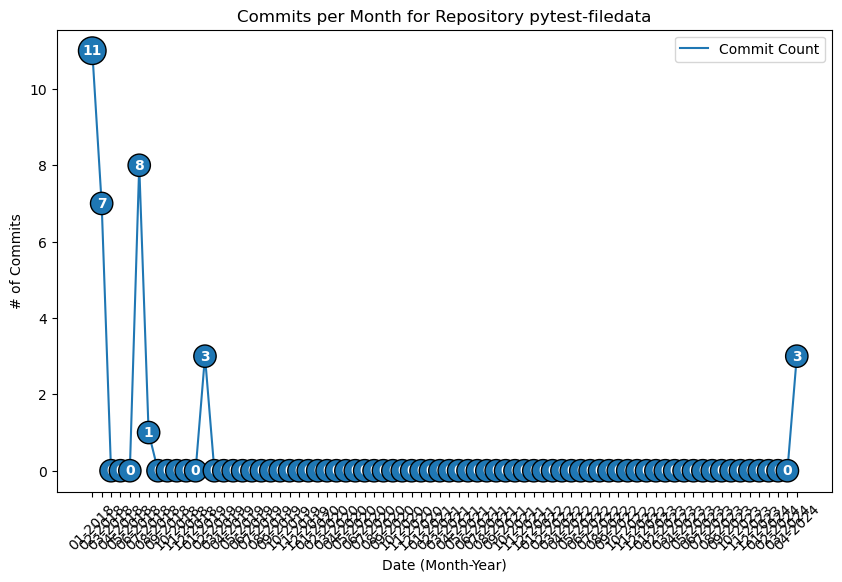

In [52]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the line
palette = sns.color_palette('tab10', len(commit_per_month))
sns.lineplot(data=commit_per_month, x='date', y='COUNT(c)', palette=palette)

# Annotate each point with the exact number
for i in range(len(commit_per_month)):
    plt.plot(commit_per_month['date'].iloc[i], commit_per_month['COUNT(c)'].iloc[i], 'o', color=palette[0], markersize=10)
    plt.text(commit_per_month['date'].iloc[i], commit_per_month['COUNT(c)'].iloc[i], str(int(commit_per_month['COUNT(c)'].iloc[i])),
             ha='center', va='center', fontsize=10, color='white', weight='bold',
             bbox=dict(facecolor=palette[0], alpha=1, boxstyle='circle,pad=0.3'))

# Set the labels and title
plt.xlabel('Date (Month-Year)')
plt.ylabel('# of Commits')
plt.legend(['Commit Count'])
plt.title('Commits per Month for Repository {}'.format(df_entry['project_name']))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

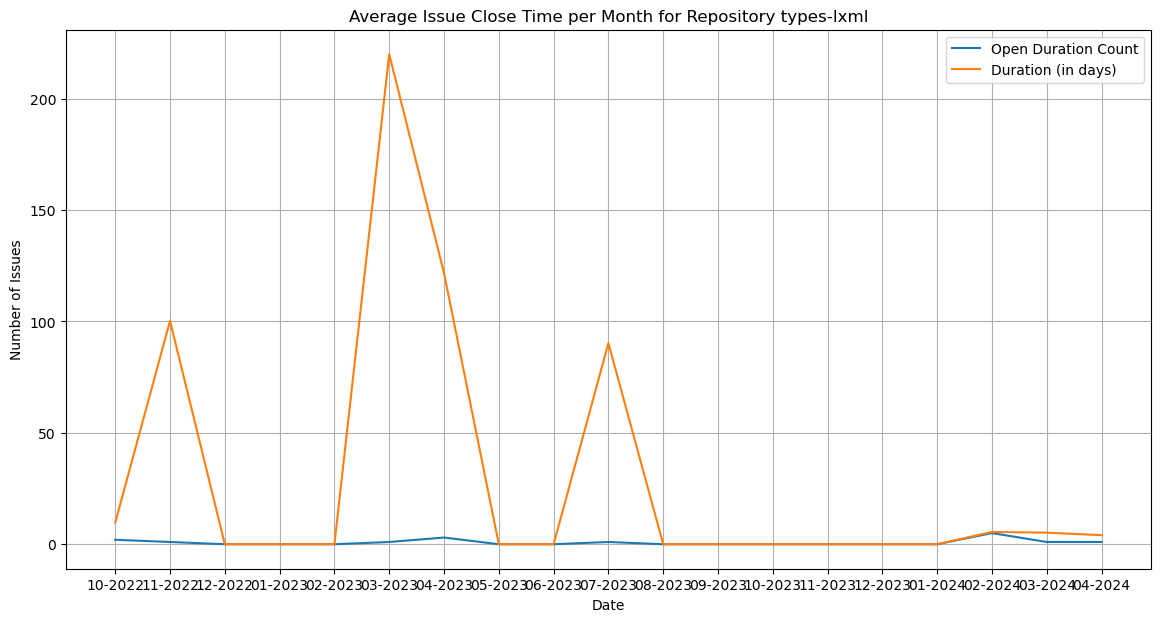

,date,year,month,COUNT(open_duration),duration
0,10-2022,2022,10,2.0,9.660666
1,11-2022,2022,11,1.0,100.290613
2,12-2022,2022,12,0.0,0.000000
3,01-2023,2023,01,0.0,0.000000
4,02-2023,2023,02,0.0,0.000000
5,03-2023,2023,03,1.0,219.998356
6,04-2023,2023,04,3.0,121.751281
7,05-2023,2023,05,0.0,0.000000
8,06-2023,2023,06,0.0,0.000000
9,07-2023,2023,07,1.0,90.276829


In [16]:
avg_issue_close_time_per_month = pd.json_normalize(df_entry['get_avg_issue_close_time_per_month'])
avg_issue_close_time_per_month = array_to_duration(avg_issue_close_time_per_month, 'AVG(open_duration)')
avg_issue_close_time_per_month = implement_months(avg_issue_close_time_per_month)

# Plotting with seaborn
plt.figure(figsize=(14, 7))
sns.lineplot(data=avg_issue_close_time_per_month, x='date', y='COUNT(open_duration)', label='Open Duration Count')
sns.lineplot(data=avg_issue_close_time_per_month, x='date', y='duration', label='Duration (in days)')

# Formatting the plot
plt.title('Average Issue Close Time per Month for Repository {}'.format(df_entry['project_name']))
plt.xlabel('Date')
plt.ylabel('Number of Issues')
plt.legend()
plt.grid(True)
plt.show()
avg_issue_close_time_per_month

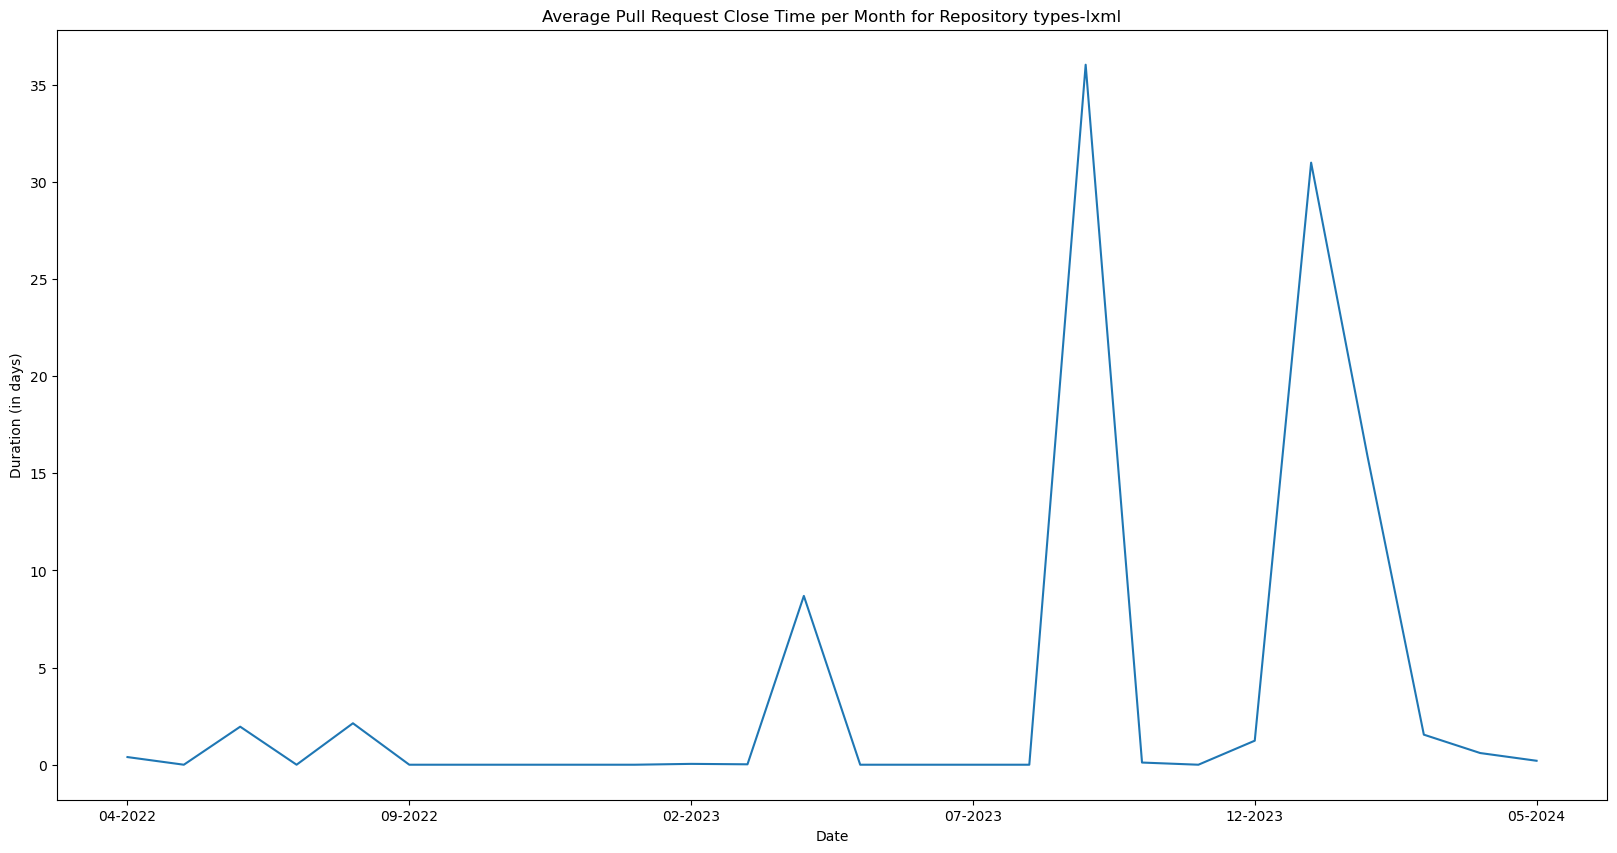

,year,month,duration
date,,,
04-2022,2022,04,0.393640
05-2022,2022,05,0.000000
06-2022,2022,06,1.958148
07-2022,2022,07,0.000000
08-2022,2022,08,2.133970
09-2022,2022,09,0.000000
10-2022,2022,10,0.000000
11-2022,2022,11,0.000000
12-2022,2022,12,0.000000


In [17]:
avg_pull_request_close_time_per_month = pd.json_normalize(df_entry['get_avg_pull_request_close_time_per_month'])
avg_pull_request_close_time_per_month = array_to_duration(avg_pull_request_close_time_per_month, 'AVG(open_duration)')
avg_pull_request_close_time_per_month = implement_months(avg_pull_request_close_time_per_month)

# Plotting new_issue_author_count_per_month
avg_pull_request_close_time_per_month.set_index('date', inplace=True)
avg_pull_request_close_time_per_month['duration'].plot(kind='line', figsize=(20, 10))
plt.title('Average Pull Request Close Time per Month for Repository {}'.format(df_entry['project_name']))
plt.ylabel('Duration (in days)')
plt.xlabel('Date')
plt.show()
avg_pull_request_close_time_per_month

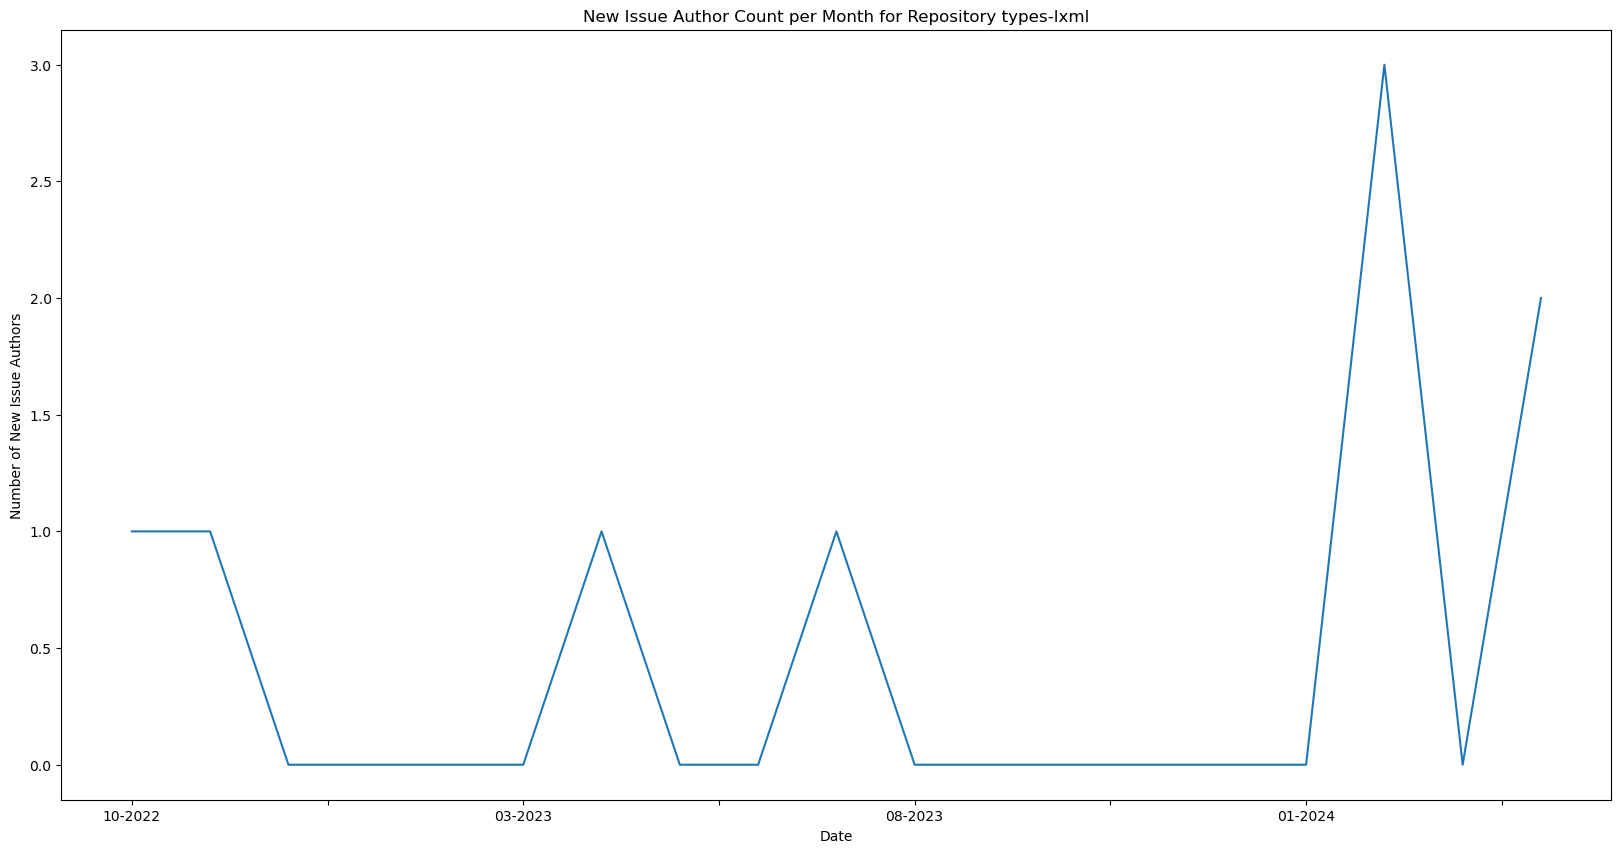

,year,month,new_authors_count
date,,,
10-2022,2022,10,1.0
11-2022,2022,11,1.0
12-2022,2022,12,0.0
01-2023,2023,01,0.0
02-2023,2023,02,0.0
03-2023,2023,03,0.0
04-2023,2023,04,1.0
05-2023,2023,05,0.0
06-2023,2023,06,0.0


In [18]:
new_issue_author_count_per_month = pd.json_normalize(df_entry['get_new_issue_author_count_per_month'])
new_issue_author_count_per_month = implement_months(new_issue_author_count_per_month)

# Plotting new_issue_author_count_per_month
new_issue_author_count_per_month.set_index('date', inplace=True)
new_issue_author_count_per_month['new_authors_count'].plot(kind='line', figsize=(20, 10))
plt.title('New Issue Author Count per Month for Repository {}'.format(df_entry['project_name']))
plt.ylabel('Number of New Issue Authors')
plt.xlabel('Date')
plt.show()
new_issue_author_count_per_month

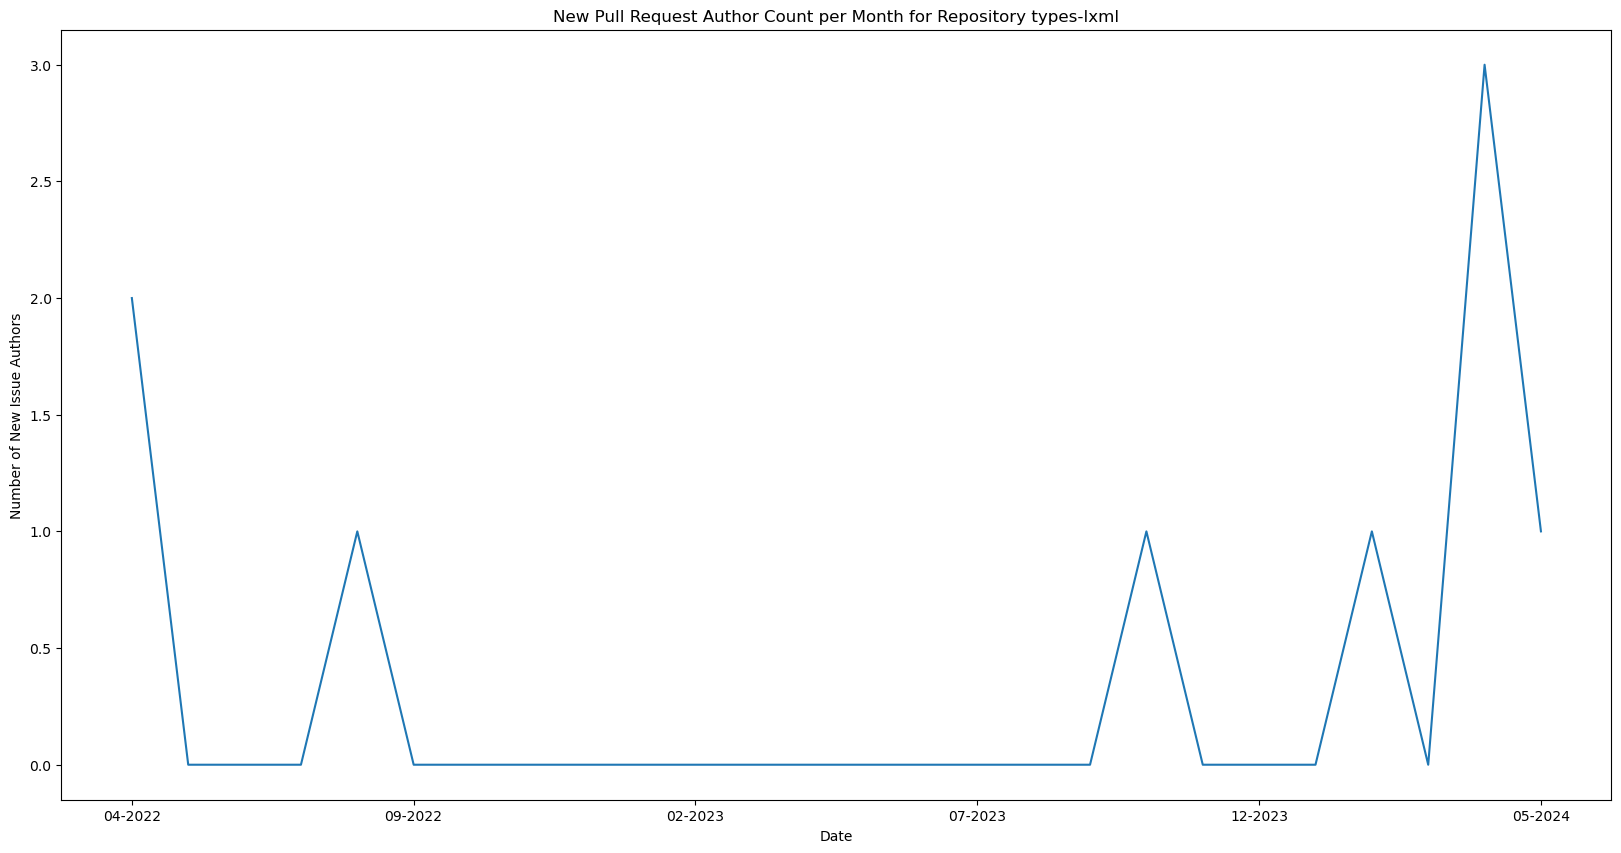

,year,month,new_authors_count
date,,,
04-2022,2022,04,2.0
05-2022,2022,05,0.0
06-2022,2022,06,0.0
07-2022,2022,07,0.0
08-2022,2022,08,1.0
09-2022,2022,09,0.0
10-2022,2022,10,0.0
11-2022,2022,11,0.0
12-2022,2022,12,0.0


In [19]:
new_pull_request_author_count_per_month = pd.json_normalize(df_entry['get_new_pull_request_author_count_per_month'])
new_pull_request_author_count_per_month = implement_months(new_pull_request_author_count_per_month)

# Plotting new_pull_request_author_count_per_month
new_pull_request_author_count_per_month.set_index('date', inplace=True)
new_pull_request_author_count_per_month['new_authors_count'].plot(kind='line', figsize=(20, 10))
plt.title('New Pull Request Author Count per Month for Repository {}'.format(df_entry['project_name']))
plt.ylabel('Number of New Issue Authors')
plt.xlabel('Date')
plt.show()
new_pull_request_author_count_per_month

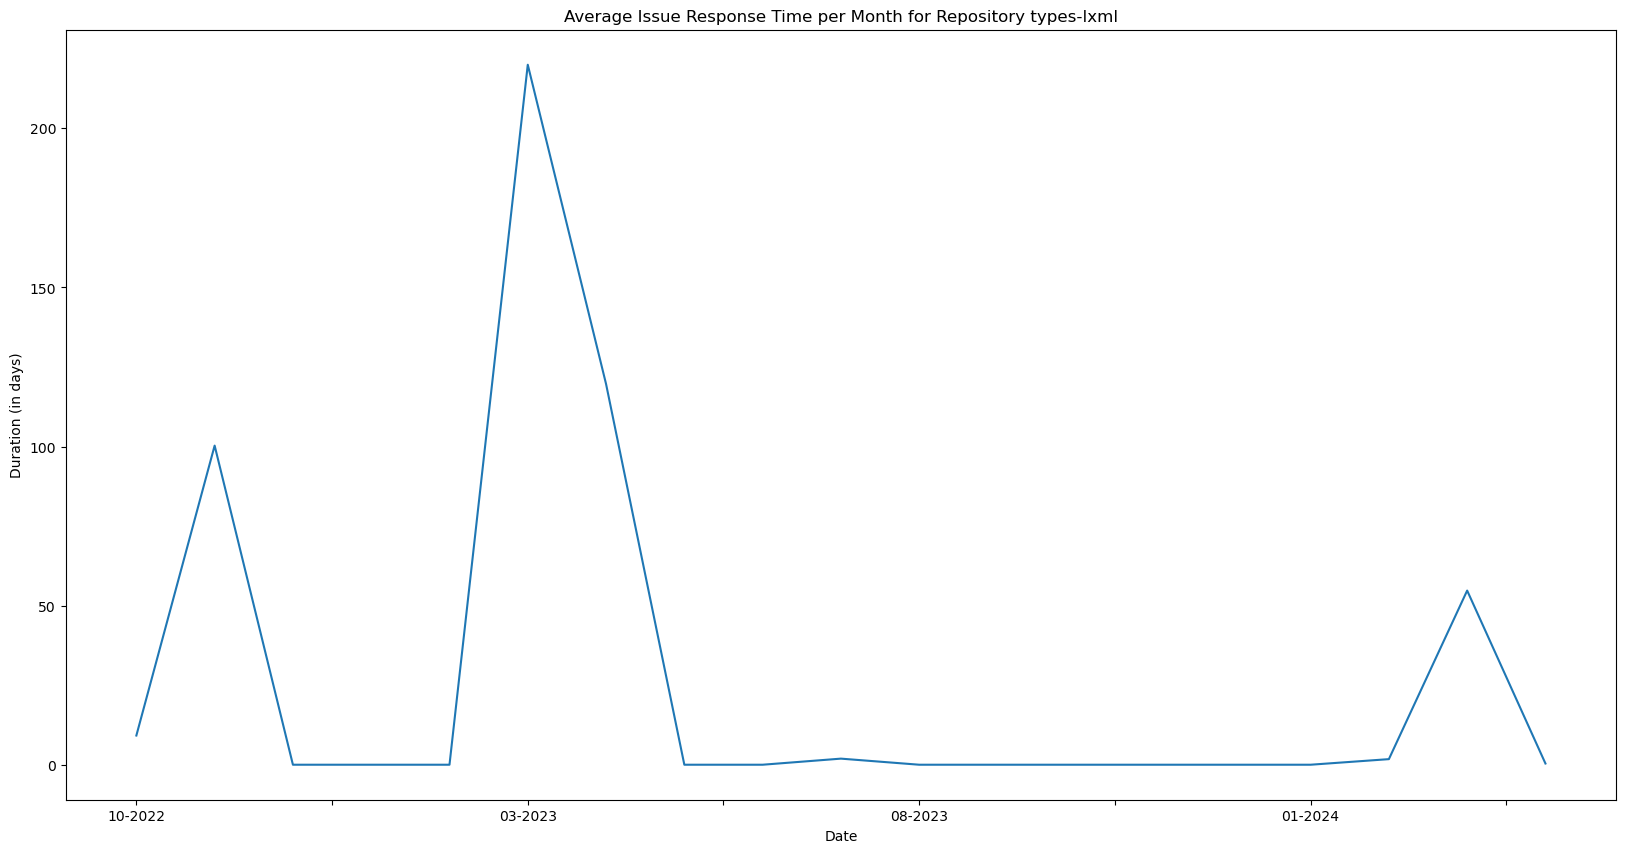

,year,month,duration
date,,,
10-2022,2022,10,9.173640
11-2022,2022,11,100.290266
12-2022,2022,12,0.000000
01-2023,2023,01,0.000000
02-2023,2023,02,0.000000
03-2023,2023,03,219.998229
04-2023,2023,04,119.660872
05-2023,2023,05,0.000000
06-2023,2023,06,0.000000


In [20]:
avg_issue_response_time_per_month = pd.json_normalize(df_entry['get_avg_issue_response_time_per_month'])
avg_issue_response_time_per_month = array_to_duration(avg_issue_response_time_per_month, 'avg_response_time')
avg_issue_response_time_per_month = implement_months(avg_issue_response_time_per_month)

# Plotting new_pull_request_author_count_per_month
avg_issue_response_time_per_month.set_index('date', inplace=True)
avg_issue_response_time_per_month['duration'].plot(kind='line', figsize=(20, 10))
plt.title('Average Issue Response Time per Month for Repository {}'.format(df_entry['project_name']))
plt.ylabel('Duration (in days)')
plt.xlabel('Date')
plt.show()
avg_issue_response_time_per_month

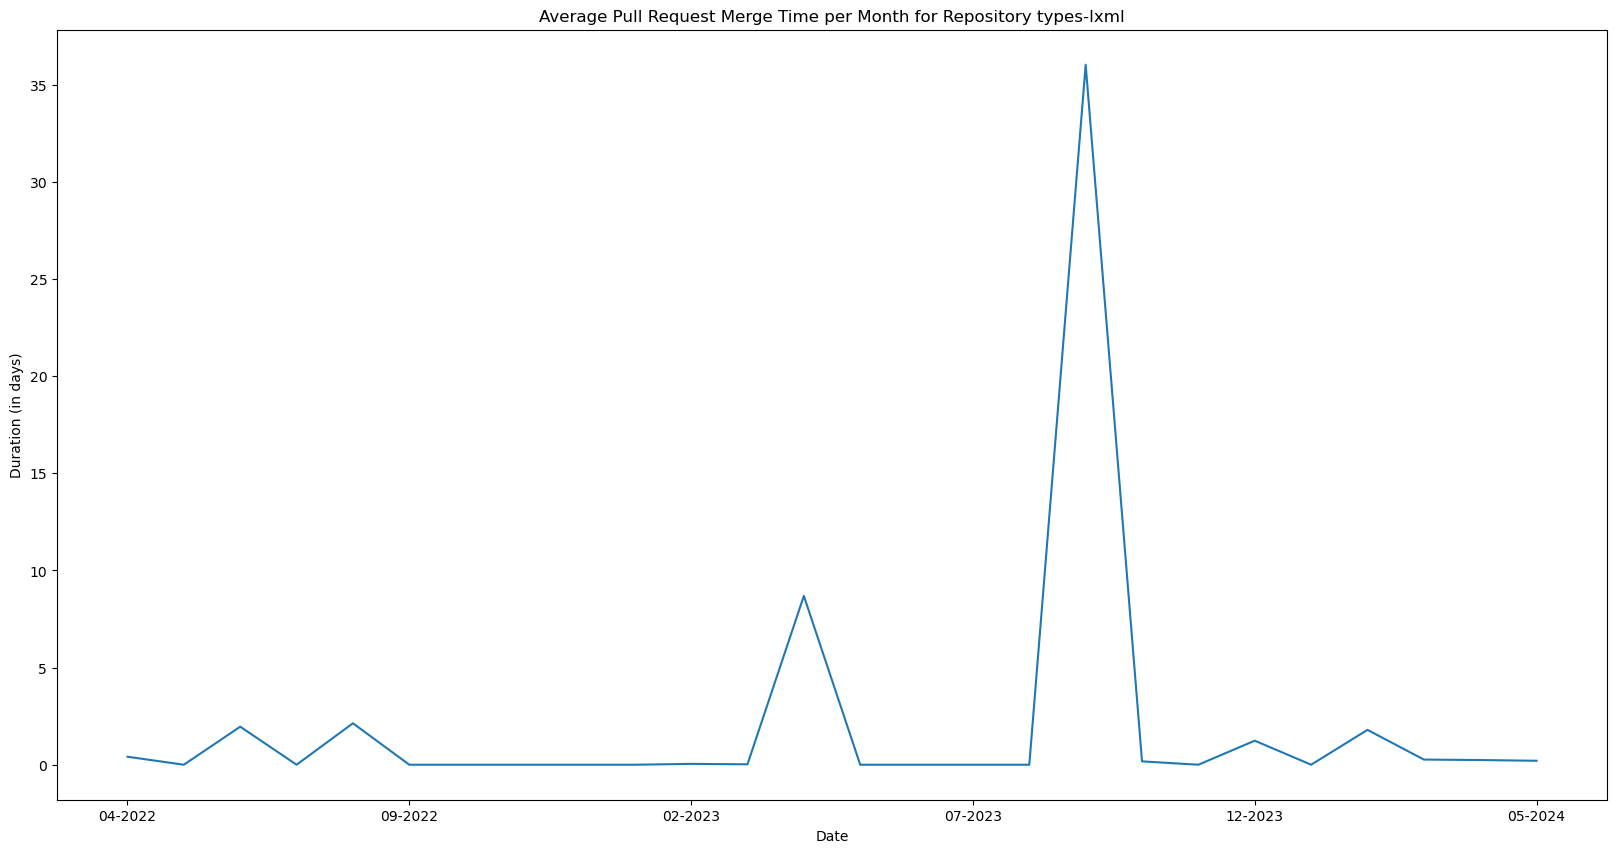

,year,month,duration
date,,,
04-2022,2022,04,0.411262
05-2022,2022,05,0.000000
06-2022,2022,06,1.958148
07-2022,2022,07,0.000000
08-2022,2022,08,2.133970
09-2022,2022,09,0.000000
10-2022,2022,10,0.000000
11-2022,2022,11,0.000000
12-2022,2022,12,0.000000


In [21]:
avg_pull_request_merge_time_per_month = pd.json_normalize(df_entry['get_avg_pull_request_merge_time_per_month'])
avg_pull_request_merge_time_per_month = array_to_duration(avg_pull_request_merge_time_per_month, 'avg_merge_duration')
avg_pull_request_merge_time_per_month = implement_months(avg_pull_request_merge_time_per_month)

# Plotting new_pull_request_author_count_per_month
avg_pull_request_merge_time_per_month.set_index('date', inplace=True)
avg_pull_request_merge_time_per_month['duration'].plot(kind='line', figsize=(20, 10))
plt.title('Average Pull Request Merge Time per Month for Repository {}'.format(df_entry['project_name']))
plt.ylabel('Duration (in days)')
plt.xlabel('Date')
plt.show()
avg_pull_request_merge_time_per_month

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

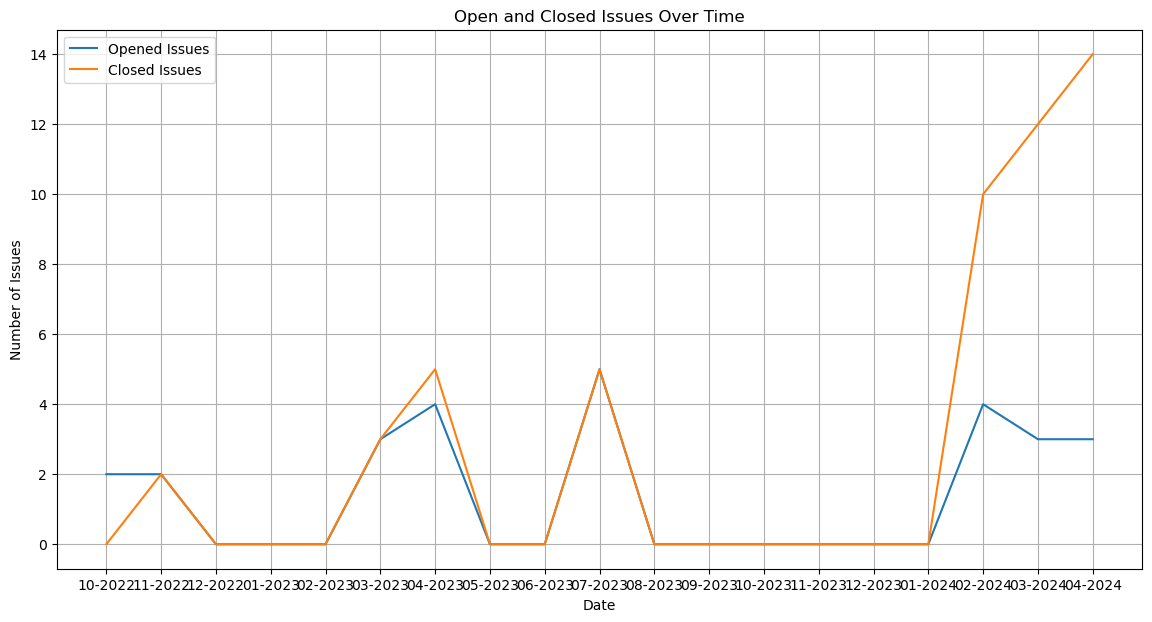

,year,month,opened_issues,closed_issues
date,,,,
10-2022,2022,10,2.0,0.0
11-2022,2022,11,2.0,2.0
12-2022,2022,12,0.0,0.0
01-2023,2023,01,0.0,0.0
02-2023,2023,02,0.0,0.0
03-2023,2023,03,3.0,3.0
04-2023,2023,04,4.0,5.0
05-2023,2023,05,0.0,0.0
06-2023,2023,06,0.0,0.0


In [22]:
closed_issues_per_month = pd.json_normalize(df_entry['get_closed_issues_per_month'])
closed_issues_per_month = implement_months(closed_issues_per_month)

# Fill NaN values in 'closed_pull_requests' with 0
closed_issues_per_month['opened_issues'].fillna(0, inplace=True)
closed_issues_per_month['closed_issues'].fillna(0, inplace=True)

closed_issues_per_month.set_index('date', inplace=True)

# Plotting with seaborn
plt.figure(figsize=(14, 7))
sns.lineplot(data=closed_issues_per_month, x='date', y='opened_issues', label='Opened Issues')
sns.lineplot(data=closed_issues_per_month, x='date', y='closed_issues', label='Closed Issues')

# Formatting the plot
plt.title('Open and Closed Issues Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Issues')
plt.legend()
plt.grid(True)
plt.show()
closed_issues_per_month

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

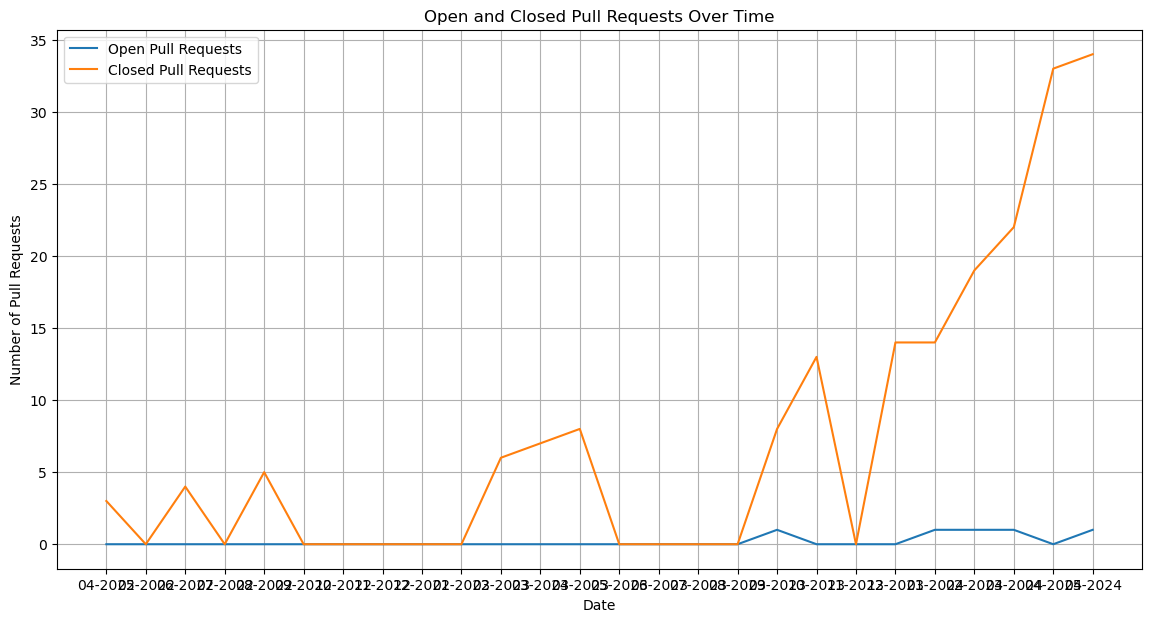

,year,month,open_pull_requests,closed_pull_requests
date,,,,
04-2022,2022,04,0.0,3.0
05-2022,2022,05,0.0,0.0
06-2022,2022,06,0.0,4.0
07-2022,2022,07,0.0,0.0
08-2022,2022,08,0.0,5.0
09-2022,2022,09,0.0,0.0
10-2022,2022,10,0.0,0.0
11-2022,2022,11,0.0,0.0
12-2022,2022,12,0.0,0.0


In [23]:
closed_pull_requests_per_month = pd.json_normalize(df_entry['get_closed_pull_requests_per_month'])
closed_pull_requests_per_month = implement_months(closed_pull_requests_per_month)

# Fill NaN values in 'closed_pull_requests' with 0
closed_pull_requests_per_month['open_pull_requests'].fillna(0, inplace=True)
closed_pull_requests_per_month['closed_pull_requests'].fillna(0, inplace=True)

closed_pull_requests_per_month.set_index('date', inplace=True)

# Plotting with seaborn
plt.figure(figsize=(14, 7))
sns.lineplot(data=closed_pull_requests_per_month, x='date', y='open_pull_requests', label='Open Pull Requests')
sns.lineplot(data=closed_pull_requests_per_month, x='date', y='closed_pull_requests', label='Closed Pull Requests')

# Formatting the plot
plt.title('Open and Closed Pull Requests Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Pull Requests')
plt.legend()
plt.grid(True)
plt.show()
closed_pull_requests_per_month

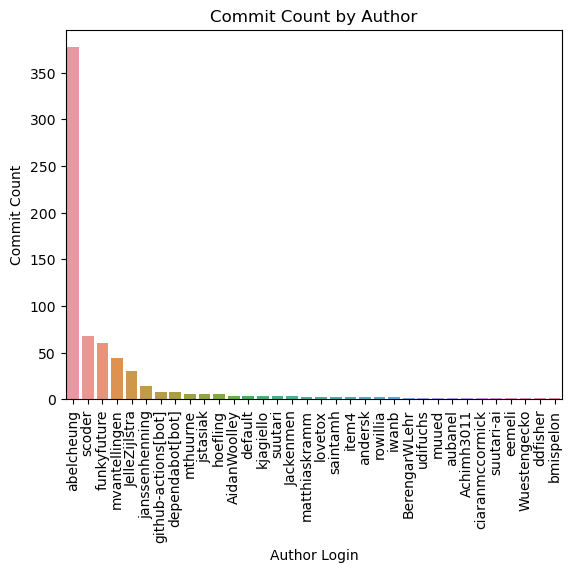

In [24]:
commits_count_by_author_descending = pd.json_normalize(df_entry['get_commits_count_by_author_descending'])

sns.barplot(data=commits_count_by_author_descending, x="author_login", y="commit_count")
plt.xticks(rotation=90)
plt.xlabel("Author Login")
plt.ylabel("Commit Count")
plt.title("Commit Count by Author")
plt.show()

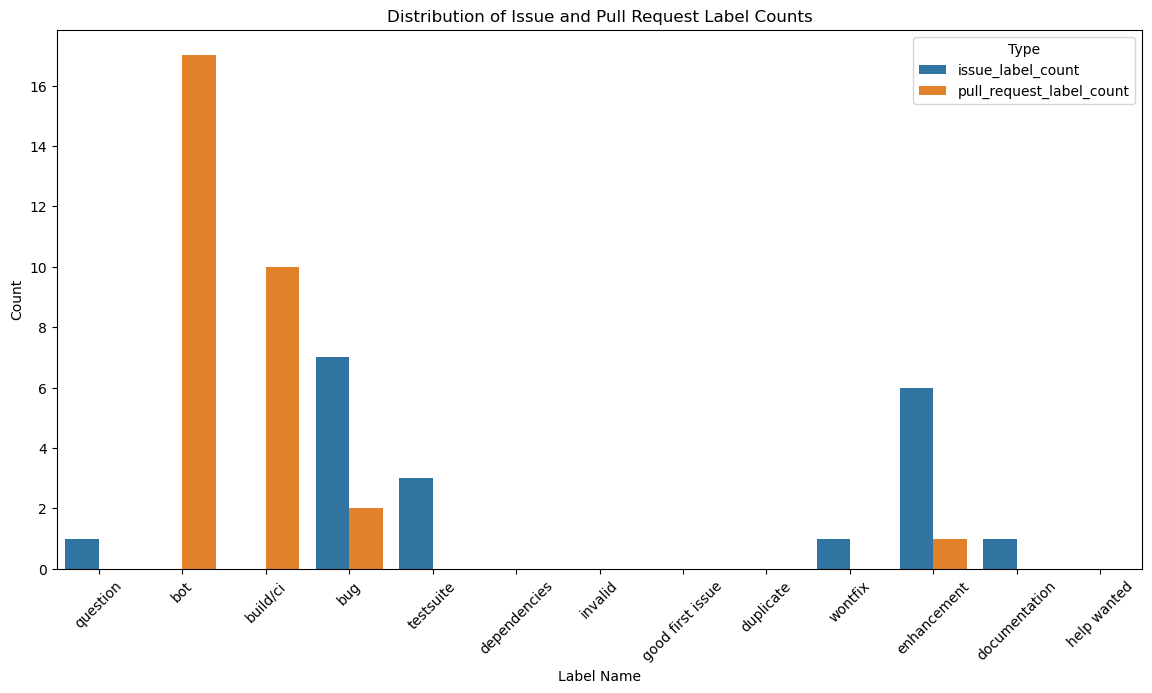

In [25]:
label_issue_and_pull_request_count = pd.json_normalize(df_entry['get_label_issue_and_pull_request_count'])

# Melt the dataframe to make it suitable for seaborn's barplot
df_melted = label_issue_and_pull_request_count.melt(id_vars='l.name', 
                                                    value_vars=['issue_label_count', 'pull_request_label_count'], 
                                                    var_name='Type', 
                                                    value_name='Count')

# Plotting embedded histograms with seaborn
plt.figure(figsize=(14, 7))
sns.barplot(data=df_melted, x='l.name', y='Count', hue='Type')

plt.title('Distribution of Issue and Pull Request Label Counts')
plt.xlabel('Label Name')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Type')
plt.show()

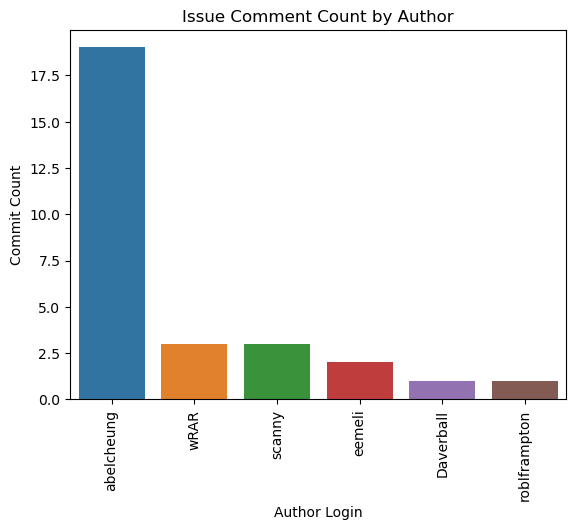

In [26]:
issue_author_comment_count = pd.json_normalize(df_entry['get_issue_author_comment_count'])
issue_author_comment_count.sort_values(by='comment_count', ascending=False, inplace=True)
sns.barplot(data=issue_author_comment_count, x="u.login", y="comment_count")
plt.xticks(rotation=90)
plt.xlabel("Author Login")
plt.ylabel("Commit Count")
plt.title("Issue Comment Count by Author")
plt.show()

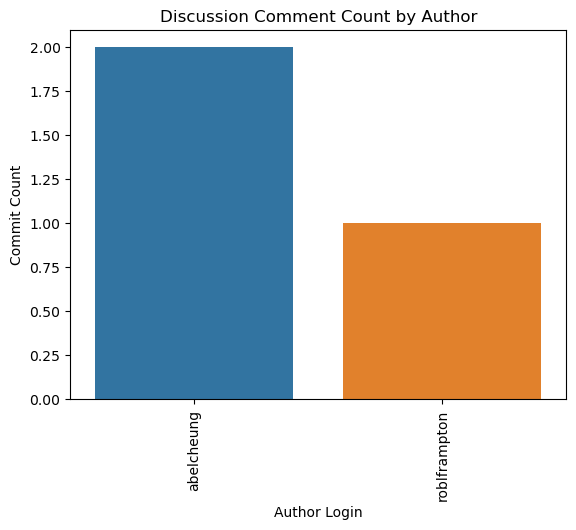

In [27]:
discussion_author_comment_count = pd.json_normalize(df_entry['get_discussion_author_comment_count'])
discussion_author_comment_count.sort_values(by='comment_count', ascending=False, inplace=True)
sns.barplot(data=discussion_author_comment_count, x="u.login", y="comment_count")
plt.xticks(rotation=90)
plt.xlabel("Author Login")
plt.ylabel("Commit Count")
plt.title("Discussion Comment Count by Author")
plt.show()

In [28]:
project_information = df_entry['get_project_information']
print("Is the project active? {}".format(not project_information[0]['isArchived']))
if project_information[0]['isArchived']:
    print("The project was archived on {}".format(project_information[0]['archivedAt']))
print("The project was created on {}".format(project_information[0]['createdAt']))

Is the project active? True
The project was created on 2022-03-25T17:32:45+00:00


In [40]:
issue_df = pd.json_normalize(df_entry['get_issues_and_issue_comments'])
issue_df = issue_df[['issue.createdAt', 'issue.creatorRole', 'comments']].copy()
issue_df['issue.createdAt'] = issue_df['issue.createdAt'].apply(lambda x: pd.to_datetime(x))
issue_df['month'] = issue_df['issue.createdAt'].dt.month
issue_df['year'] = issue_df['issue.createdAt'].dt.year
issue_df = issue_df.rename(columns={'issue.creatorRole': 'creatorRole'})
issue_df = issue_df.drop(columns=['issue.createdAt'])
issue_df

,creatorRole,comments,month,year
0,OWNER,[],11,2022
1,OWNER,"[{'creatorRole': 'OWNER', 'createdAt': '2023-0...",11,2022
2,NONE,"[{'creatorRole': 'OWNER', 'createdAt': '2023-0...",7,2023
3,OWNER,[],3,2023
4,OWNER,"[{'creatorRole': 'OWNER', 'createdAt': '2023-1...",3,2023
5,OWNER,[],3,2024
6,NONE,"[{'creatorRole': 'OWNER', 'createdAt': '2022-1...",10,2022
7,NONE,"[{'creatorRole': 'OWNER', 'createdAt': '2022-1...",10,2022
8,NONE,"[{'creatorRole': 'OWNER', 'createdAt': '2024-0...",2,2024
9,CONTRIBUTOR,"[{'creatorRole': 'OWNER', 'createdAt': '2024-0...",2,2024


In [41]:
# Normalize the nested comments data
comments_list = []
for comments in issue_df['comments']:
    comments_list.extend(comments)
issue_df = issue_df.drop(columns=['comments'])

comments_df = pd.json_normalize(comments_list)
comments_df['createdAt'] = comments_df['createdAt'].apply(lambda x: pd.to_datetime(x))
comments_df['month'] = comments_df['createdAt'].dt.month
comments_df['year'] = comments_df['createdAt'].dt.year
comments_df = comments_df.drop(columns=['createdAt', 'creator'])
comments_df

,creatorRole,month,year
0,OWNER,2,2023
1,OWNER,7,2023
2,OWNER,10,2023
3,NONE,10,2023
4,OWNER,10,2023
5,OWNER,11,2022
6,OWNER,11,2022
7,NONE,11,2022
8,NONE,11,2022
9,OWNER,11,2022


In [42]:
comments_df = pd.concat([issue_df, comments_df]).reset_index(drop=True)
# comments_df = implement_months(comments_df)
# Display the new comments DataFrame
valid_roles = ['COLLABORATOR', 'MEMBER', 'OWNER']
comments_df = comments_df[comments_df['creatorRole'].isin(valid_roles)]
comments_df

,creatorRole,month,year
0,OWNER,11,2022
1,OWNER,11,2022
3,OWNER,3,2023
4,OWNER,3,2023
5,OWNER,3,2024
11,OWNER,2,2024
14,OWNER,4,2023
16,OWNER,4,2023
17,OWNER,2,2023
18,OWNER,7,2023


In [43]:
# grouped_counts = comments_df.groupby(['month', 'year']).size().reset_index(name='count')
grouped_counts = comments_df.groupby(['month', 'year']).size().reset_index(name='sum')
grouped_counts = implement_months(grouped_counts)
grouped_counts

,date,year,month,sum
0,11-2022,2022,11,5.0
1,12-2022,2022,12,0.0
2,01-2023,2023,01,0.0
3,02-2023,2023,02,1.0
4,03-2023,2023,03,2.0
5,04-2023,2023,04,5.0
6,05-2023,2023,05,0.0
7,06-2023,2023,06,0.0
8,07-2023,2023,07,1.0
9,08-2023,2023,08,0.0
